![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/visual-nlp/5.2.Visual_Document_Classifier_v3.ipynb)

# Visual Document Classifier v3

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

### Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
!pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, visual, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.settings.enforce_versions=True
nlp.install(refresh_install=True, visual=True)

In [ ]:
import pyspark
import sparkocr
import json
import os

### Initialize Spark session

In [ ]:
from johnsnowlabs import visual
import pandas as pd

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start(visual=True)

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_9005.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.3.1, 💊Spark-Healthcare==5.3.0, 🕶Spark-OCR==5.3.0, running on ⚡ PySpark==3.4.0


## Load test images

In [ ]:
test_image_path = visual.pkg_resources.resource_filename('sparkocr', 'resources/ocr/visualdoc/00556614_00556648.tif')
bin_df = spark.read.format("binaryFile").load(test_image_path).limit(50)
bin_df.show()

+--------------------+--------------------+------+--------------------+
|                path|    modificationTime|length|             content|
+--------------------+--------------------+------+--------------------+
|file:/usr/local/l...|2024-03-27 11:03:...|375950|[49 49 2A 00 B8 B...|
+--------------------+--------------------+------+--------------------+



## Display images


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/visualdoc/00556614_00556648.tif
    Resolution: 72 dpi
    Width: 784 px
    Height: 1000 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


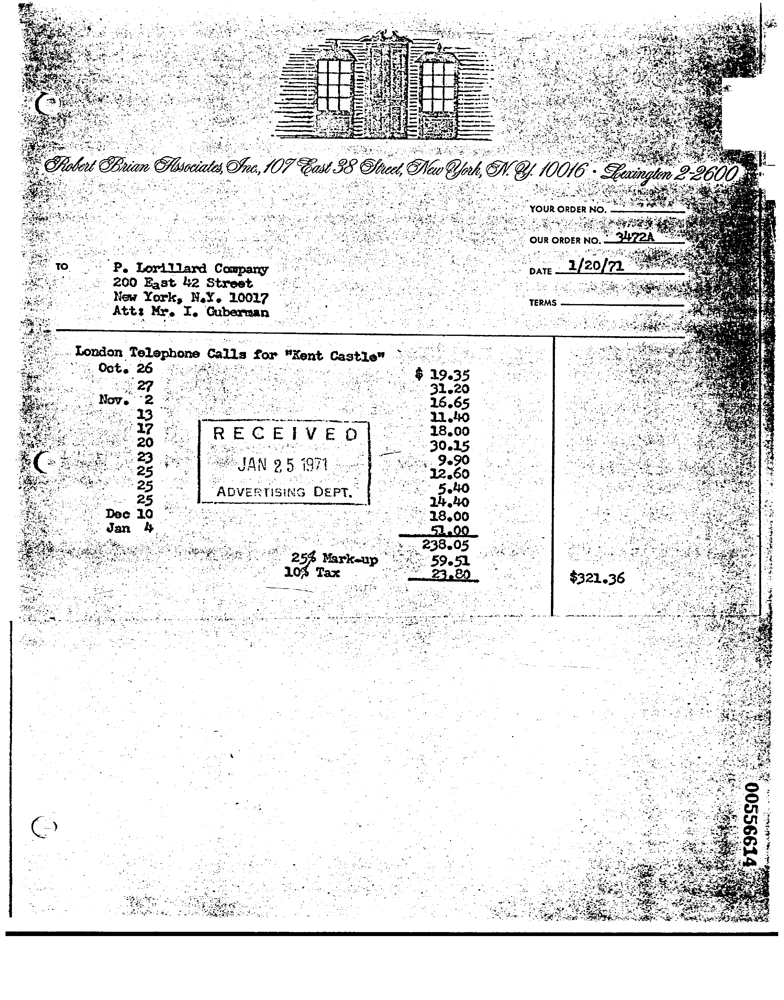

In [ ]:
image_df = visual.BinaryToImage().transform(bin_df)
visual.display_images(image_df)

### Define pipeline

In [ ]:
from sparkocr.utils import get_vocabulary_dict
from pyspark.ml import PipelineModel

binary_to_image = visual.BinaryToImage()\
    .setOutputCol("image") \
    .setImageType(visual.ImageType.TYPE_3BYTE_BGR)

doc_class = visual.VisualDocumentClassifierV3() \
    .pretrained("dit_base_finetuned_rvlcdip", "en", "clinical/ocr") \
    .setInputCols(["image"]) \
    .setOutputCol("label")

# OCR pipeline
pipeline = PipelineModel(stages=[
    binary_to_image,
    doc_class
])

## Call pipeline

In [ ]:
results = pipeline.transform(bin_df).cache()

## Show results

In [ ]:
results.select(["label"]) \
    .show(50, truncate=False)


+-------+
|label  |
+-------+
|invoice|
+-------+

